In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("customer_churn.csv")

# Explore structure
print(df.head())
print(df.info())
print(df.isnull().sum())  # check missing values
print(df.describe(include="all"))

  CustomerID  Tenure  MonthlyCharges  TotalCharges        Contract  \
0     C00001       6              64          1540        One year   
1     C00002      21             113          1753  Month-to-month   
2     C00003      27              31          1455        Two year   
3     C00004      53              29          7150  Month-to-month   
4     C00005      16             185          1023        One year   

      PaymentMethod PaperlessBilling  SeniorCitizen  Churn  
0       Credit Card               No              1      0  
1  Electronic Check              Yes              1      0  
2       Credit Card               No              1      0  
3  Electronic Check               No              1      0  
4  Electronic Check               No              1      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID  

In [2]:

df = df.dropna()

# Convert categorical variables to numeric (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=["Contract", "PaymentMethod", "PaperlessBilling"], drop_first=True)

# Example calculated column: Average Monthly Spend
df_encoded["AvgMonthlySpend"] = df_encoded["TotalCharges"] / df_encoded["Tenure"]

print(df_encoded.head())

  CustomerID  Tenure  MonthlyCharges  TotalCharges  SeniorCitizen  Churn  \
0     C00001       6              64          1540              1      0   
1     C00002      21             113          1753              1      0   
2     C00003      27              31          1455              1      0   
3     C00004      53              29          7150              1      0   
4     C00005      16             185          1023              1      0   

   Contract_One year  Contract_Two year  PaymentMethod_Credit Card  \
0               True              False                       True   
1              False              False                      False   
2              False               True                       True   
3              False              False                      False   
4               True              False                      False   

   PaymentMethod_Electronic Check  PaperlessBilling_Yes  AvgMonthlySpend  
0                           False              

    CustomerID  TotalCharges
191     C00192          7992
8       C00009          7973
255     C00256          7961
77      C00078          7937
107     C00108          7925
318     C00319          7911
312     C00313          7901
351     C00352          7888
327     C00328          7867
130     C00131          7858


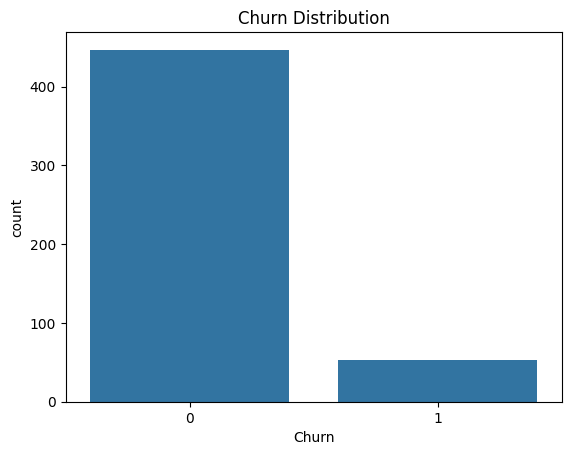

In [3]:
# Top customers by revenue
top_customers = df_encoded.sort_values(by="TotalCharges", ascending=False).head(10)
print(top_customers[["CustomerID", "TotalCharges"]])

# Lifetime Value (LTV)
df_encoded["LifetimeValue"] = df_encoded["MonthlyCharges"] * df_encoded["Tenure"]

# Churn distribution
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


Contract
Month-to-month    0.205882
One year          0.043011
Two year          0.069444
Name: Churn, dtype: float64
PaymentMethod
Bank Transfer       0.069182
Credit Card         0.134831
Electronic Check    0.110429
Name: Churn, dtype: float64


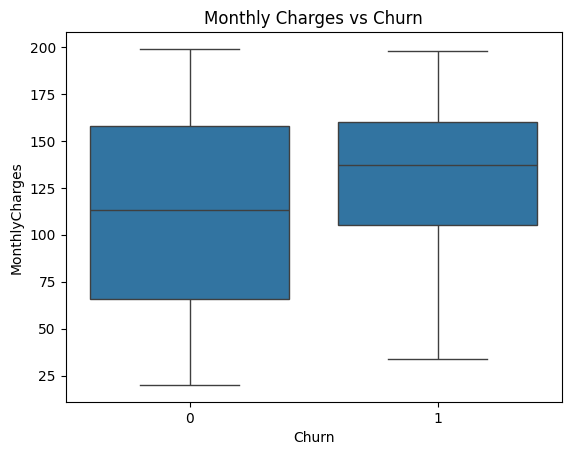

In [4]:
# Group by Contract type
contract_churn = df.groupby("Contract")["Churn"].mean()
print(contract_churn)

# Group by Payment Method
payment_churn = df.groupby("PaymentMethod")["Churn"].mean()
print(payment_churn)

# Monthly Charges vs Churn
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


PaymentMethod   Bank Transfer  Credit Card  Electronic Check
Contract                                                    
Month-to-month       0.156863     0.246154          0.203704
One year             0.015385     0.050847          0.064516
Two year             0.046512     0.092593          0.063830
Retention Rate: 0.894


C:\Users\sreen\AppData\Local\Temp\ipykernel_20136\3598795809.py:2: FutureWarning: The provided callable <function mean at 0x000001F3979A04A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = pd.pivot_table(df, values="Churn", index="Contract", columns="PaymentMethod", aggfunc=np.mean)


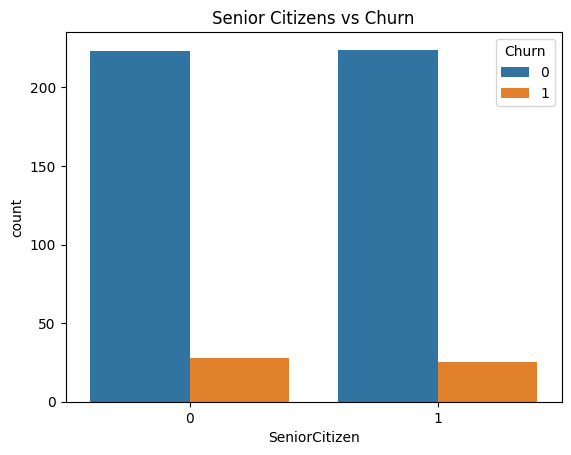

In [5]:
# Pivot table: Churn by Contract & Payment Method
pivot = pd.pivot_table(df, values="Churn", index="Contract", columns="PaymentMethod", aggfunc=np.mean)
print(pivot)

# Retention rate
retention_rate = 1 - df["Churn"].mean()
print("Retention Rate:", retention_rate)

# Cross-selling opportunity: Senior Citizens vs Churn
sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
plt.title("Senior Citizens vs Churn")
plt.show()


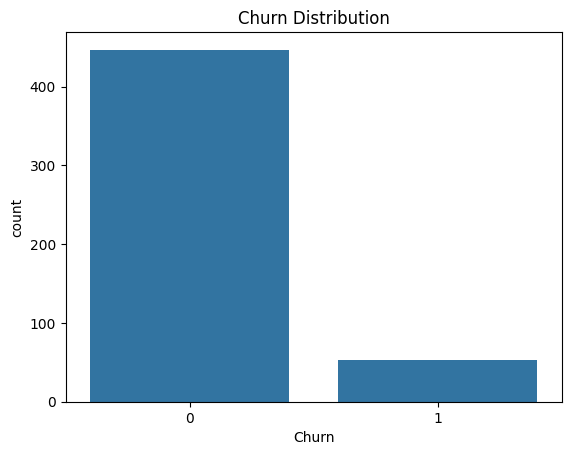

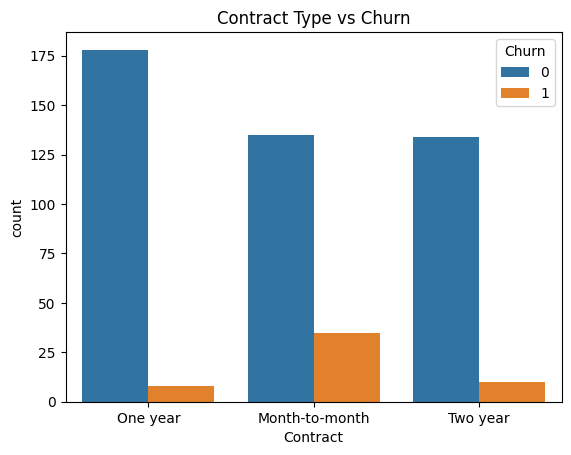

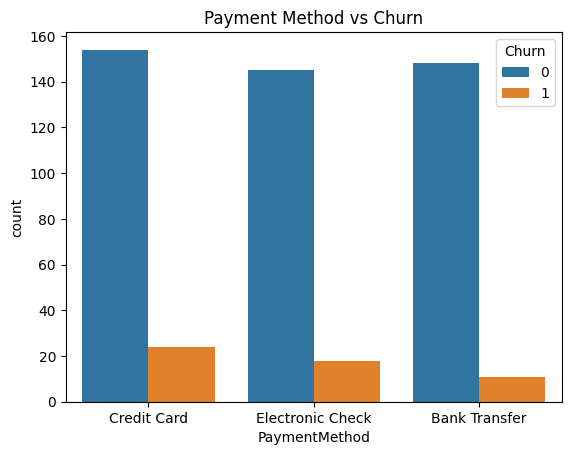

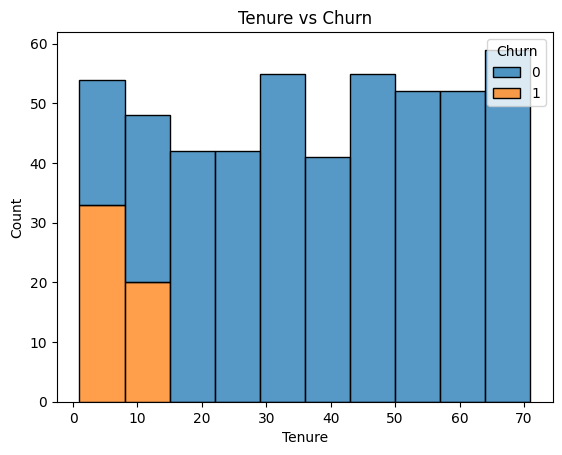

In [6]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

# Visualization 2: Contract vs Churn
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")
plt.show()

# Visualization 3: Payment Method vs Churn
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Payment Method vs Churn")
plt.show()

# Visualization 4: Tenure vs Churn
sns.histplot(data=df, x="Tenure", hue="Churn", multiple="stack")
plt.title("Tenure vs Churn")
plt.show()


### Executive Summary:
- Customers with month-to-month contracts show highest churn.
- Electronic Check payment users are more likely to churn.
- Longer tenure customers have lower churn rates.
- Senior citizens show slightly higher churn risk
- Recommendations: Incentivize long-term contracts, improve retention programs for high-risk groups.
